**Predicting Hotel Booking Cancellations Using Machine Learning**


we will perform analysis of Hotel Booking Cancellations using the Kaggle Hotel booking demand

https://www.kaggle.com/datasets/jessemostipak/hotel-booking-demand/data


Research Question
What are the most important features affecting Hotel Booking Cancellations

**Import Lib**

In [144]:
!pip install datasist

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import kagglehub
import os
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder, StandardScaler
from datasist.structdata import detect_outliers
from scipy import stats
from scipy.stats import skew, kurtosis, probplot
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFE



%matplotlib inline
sns.set(rc={'figure.figsize': [10, 5]}, font_scale=1.3)
pd.set_option('mode.chained_assignment', None)

## **1. Get Data**

In [145]:

path = kagglehub.dataset_download("jessemostipak/hotel-booking-demand")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/hotel-booking-demand


In [146]:

df = pd.read_csv(os.path.join(path, "hotel_bookings.csv"))

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [147]:
#Dataset shape

print("Dataset shape:", df.shape)

#Basic information

df.info()


Dataset shape: (119390, 32)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  i

In [148]:
# Statistical summary

df.describe()


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## **2. Data Preprocessing**

**Duplicated**

In [149]:
df.duplicated().sum()


np.int64(31994)

In [150]:
df.drop_duplicates(inplace = True, keep = "first")
df.duplicated().sum()

np.int64(0)

**Missing**

In [151]:
# Check for missing values
df.isnull().sum().sort_values(ascending=False)


,0
company,82137
agent,12193
country,452
children,4
arrival_date_month,0
arrival_date_week_number,0
hotel,0
is_canceled,0
stays_in_weekend_nights,0
arrival_date_day_of_month,0


In [152]:
# Percentage of missing values per column

missing = df.isnull().mean() * 100
missing[missing > 0].sort_values(ascending=False)


,0
company,93.982562
agent,13.951439
country,0.517186
children,0.004577


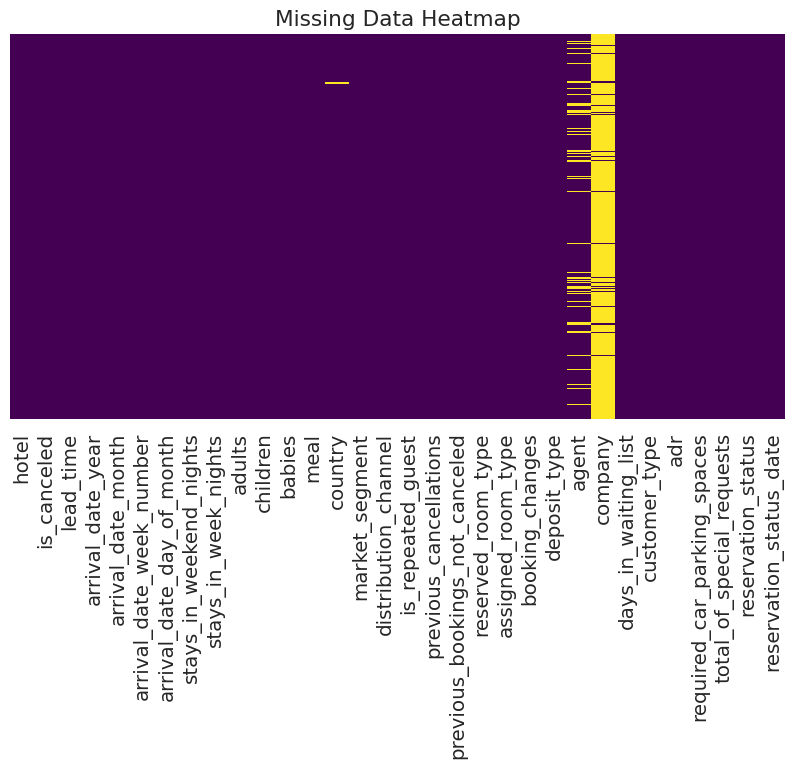

<Figure size 1200x600 with 0 Axes>

In [153]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.figure(figsize=(12, 6))
plt.tight_layout()
plt.show()

In [154]:
#fill missing

df['children'] = df['children'].fillna(0)
df['agent'] = df['agent'].astype(str).fillna('No Agent')
df['company'] = df['company'].astype(str).fillna('No Company')

#drop missing in country

df = df.dropna(subset=['country'])

In [155]:
# Remove rows where there are no guests

df = df.query('not (children == 0 and adults == 0 and babies == 0)')
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,nan,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,nan,nan,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,nan,nan,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,nan,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,nan,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,nan,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,nan,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,nan,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,nan,0,Transient,104.40,0,0,Check-Out,2017-09-07


**Data Type**

In [156]:
# Convert relevant columns to appropriate types

df['is_canceled'] = df['is_canceled'].astype(int)
df['children'] = df['children'].astype(int)
df['agent'] = df['agent'].astype(str)
df['company'] = df['company'].astype(str)
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['arrival_date_month'] = df['arrival_date_month'].astype(str)
df['hotel'] = df['hotel'].astype(str)
df['meal'] = df['meal'].astype(str)
df['country'] = df['country'].astype(str)
df['market_segment'] = df['market_segment'].astype(str)
df['distribution_channel'] = df['distribution_channel'].astype(str)
df['reserved_room_type'] = df['reserved_room_type'].astype(str)
df['assigned_room_type'] = df['assigned_room_type'].astype(str)
df['deposit_type'] = df['deposit_type'].astype(str)
df['customer_type'] = df['customer_type'].astype(str)
df['reservation_status'] = df['reservation_status'].astype(str)

In [157]:
numerical_features = [col for col in df.columns if df[col].dtype != 'object']
numerical_features

['is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status_date']

In [158]:
category_features = [col for col in df.columns if df[col].dtype == 'object']
category_features

['hotel',
 'arrival_date_month',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'reserved_room_type',
 'assigned_room_type',
 'deposit_type',
 'agent',
 'company',
 'customer_type',
 'reservation_status']

**outliers**

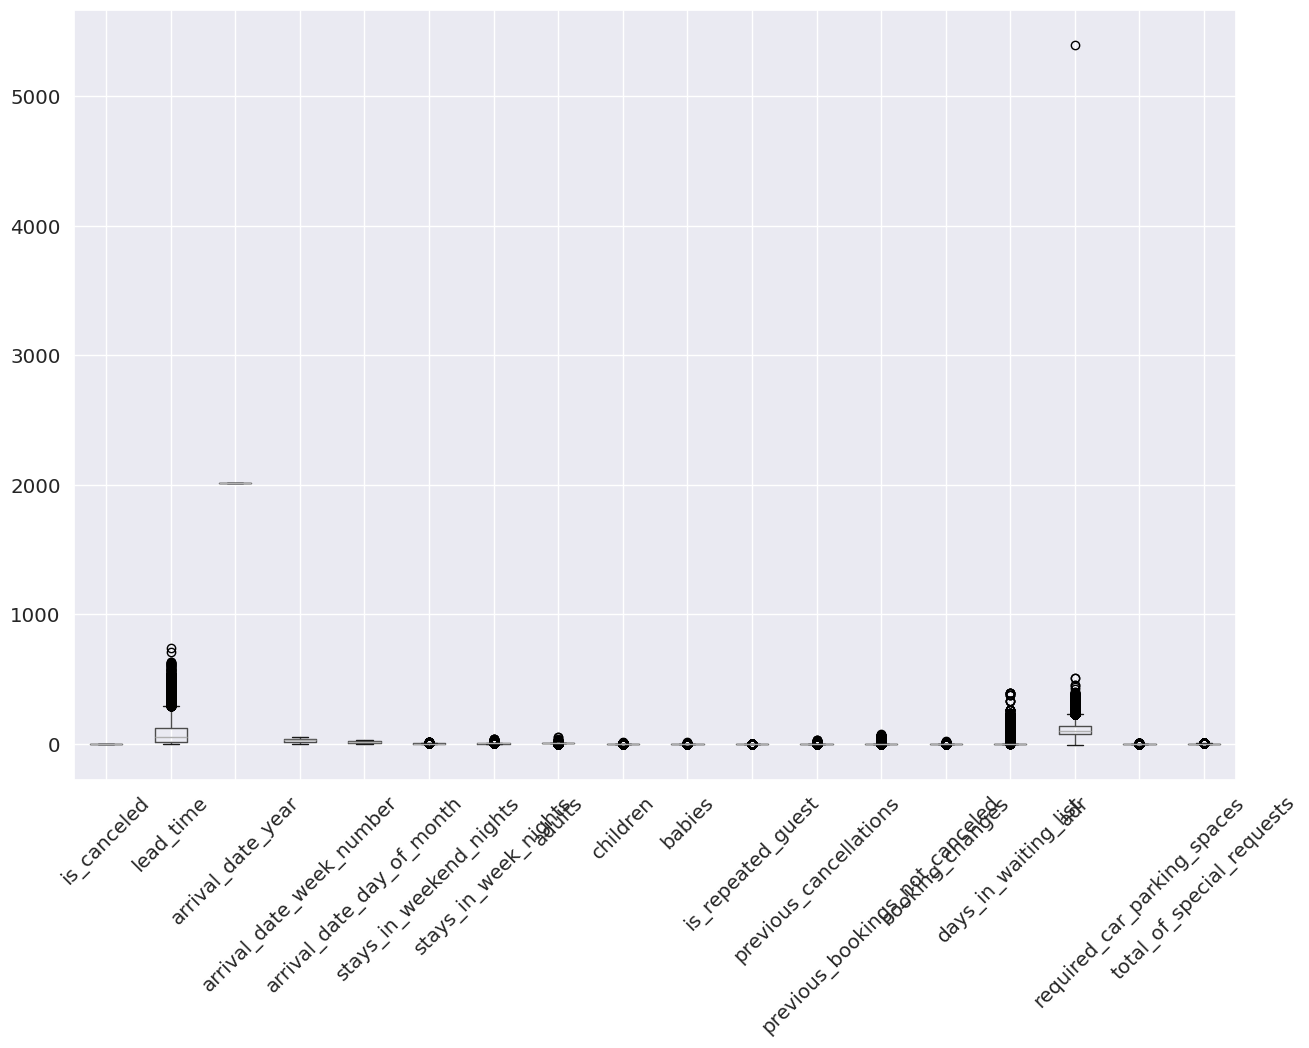

In [159]:
# Boxplots for numerical columns to check outliers


df[numerical_features].boxplot( figsize=(15, 10))
plt.xticks(rotation=45)
plt.show()


In [160]:

outliers_indices = detect_outliers(df, 0, numerical_features)

len(outliers_indices)

47129

In [161]:
df.drop(outliers_indices, inplace=True)
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,nan,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,No Deposit,nan,nan,0,Transient,107.00,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,No Deposit,303.0,nan,0,Transient,103.00,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,No Deposit,240.0,nan,0,Transient,82.00,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,No Deposit,15.0,nan,0,Transient,105.50,0,0,Canceled,2015-04-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,No Deposit,42.0,nan,0,Transient,87.60,0,0,Check-Out,2017-09-06
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,No Deposit,394.0,nan,0,Transient,96.14,0,2,Check-Out,2017-09-06
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,nan,0,Transient,96.14,0,0,Check-Out,2017-09-06
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,nan,0,Transient,104.40,0,0,Check-Out,2017-09-07


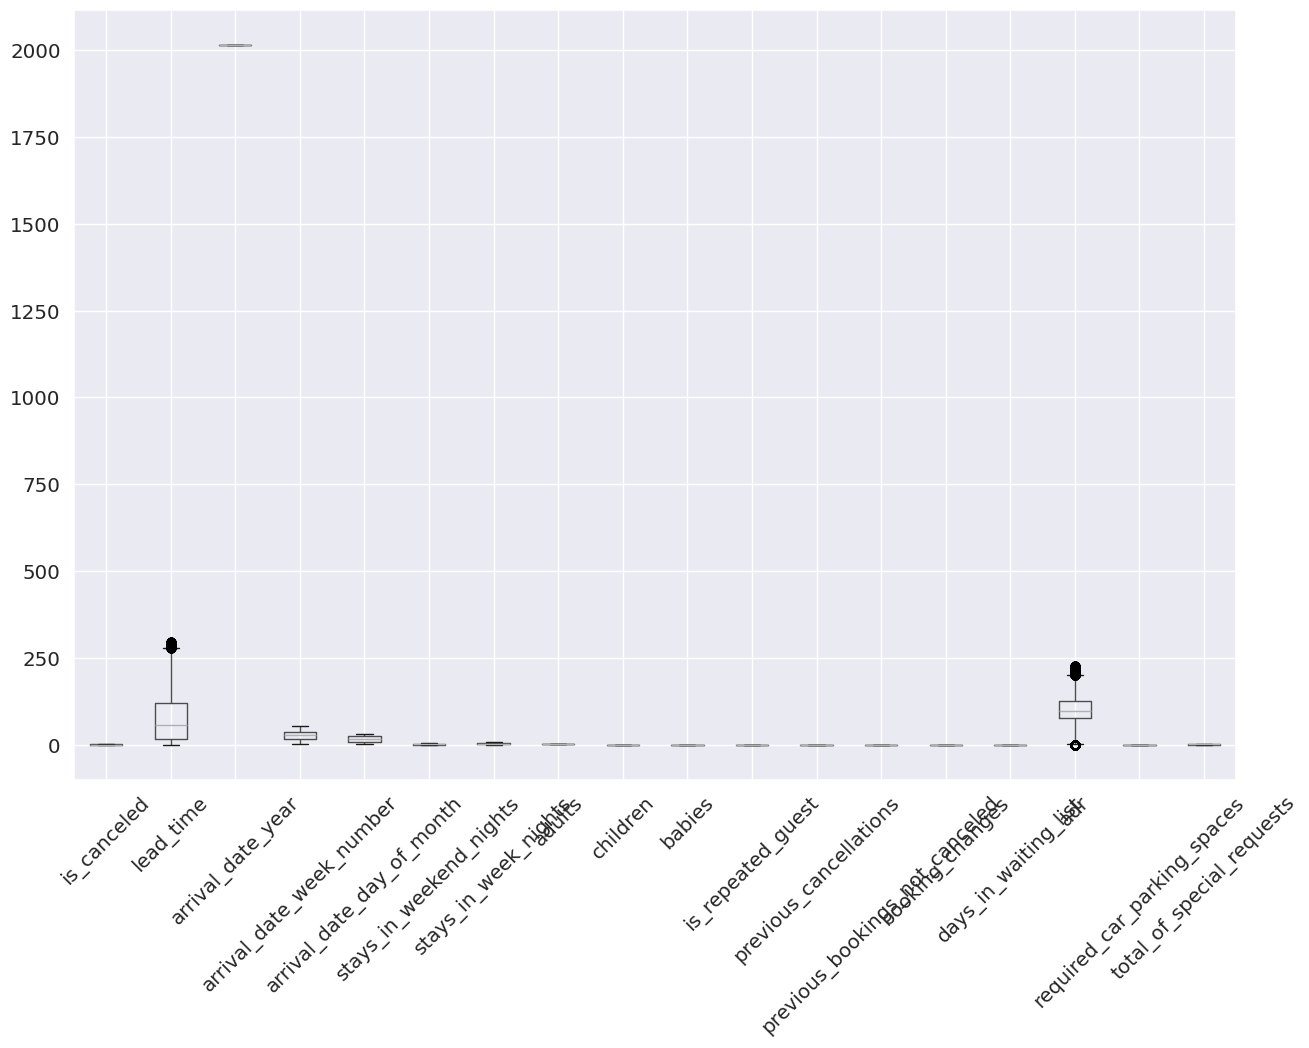

In [162]:
df[numerical_features].boxplot( figsize=(15, 10))
plt.xticks(rotation=45)
plt.show()


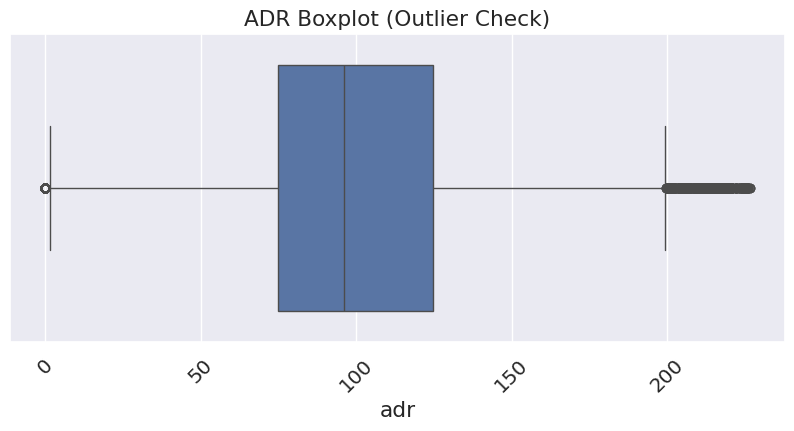

In [163]:
# Visualize (Average Daily Rate) for outliers removal check

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['adr'])
plt.xticks(rotation=45)
plt.title("ADR Boxplot (Outlier Check)")
plt.show()



**Feature Engineering**

In [164]:
# Create arrival_date

# month names to numbers
month_map = {
    'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
    'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12
}

df['arrival_month_num'] = df['arrival_date_month'].map(month_map)
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_month_num'].astype(str) + '-' +
    df['arrival_date_day_of_month'].astype(str)
)

# create a booking gap feature (days between reservation and arrival)

df['booking_gap'] = (df['arrival_date'] - df['reservation_status_date']).dt.days


# check for illogical booking gaps (negative values indicate reservation after arrival)
invalid_bookings = df[df['booking_gap'] < 0]
invalid_count = len(invalid_bookings)
print(f"Number of illogical bookings (reservation after arrival): {invalid_count}")
if invalid_count > 0:
    print("  These records need to be cleaned")



# Check if reserved room matches assigned room
df['room_same'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)
room_match_rate = df['room_same'].mean() * 100
print(f"Percentage of bookings where reserved room matches assigned room: {room_match_rate:.1f}%")


Number of illogical bookings (reservation after arrival): 27075
  These records need to be cleaned
Percentage of bookings where reserved room matches assigned room: 88.7%


In [165]:
# Adjust negative booking gap
df['arrival_date'] = pd.to_datetime(df[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']]
                                  .astype(str).apply('-'.join, axis=1))
df['booking_date'] = df['arrival_date'] - pd.to_timedelta(df['lead_time'], unit='D')

# Calculate booking gap correctly (positive)
df['booking_gap'] = (df['arrival_date'] - df['booking_date']).dt.days

# Verify no negative gaps
print("Number of negative gaps after correction:", (df['booking_gap'] < 0).sum())

Number of negative gaps after correction: 0


In [166]:
# create a feature for total guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']


# Create a feature for total nights stayed
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']


# Create a feature for special requests per night
df['requests_per_night'] = df['total_of_special_requests'] / df['total_nights'].replace(0, 1)  # Avoid division by zero


# Create a feature for booking lead time (in months)
df['lead_time_months'] = df['lead_time'] / 30.44  # Average days per month



# Total stay duration
df['total_stay'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']

# Total number of guests
df['total_guests'] = df['adults'] + df['children'] + df['babies']

# Create a single arrival_date column from year, month, and day columns
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                    df['arrival_date_month'] + '-' +
                                    df['arrival_date_day_of_month'].astype(str))

# requested room type the same as assigned
df['room_same'] = (df['reserved_room_type'] == df['assigned_room_type']).astype(int)

In [167]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,arrival_month_num,arrival_date,booking_gap,room_same,booking_date,total_guests,total_nights,requests_per_night,lead_time_months,total_stay
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,7,2015-07-01,14,1,2015-06-17,2,2,0.500000,0.459921,2
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,7,2015-07-01,0,1,2015-07-01,2,2,0.000000,0.000000,2
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,...,7,2015-07-01,9,1,2015-06-22,2,2,0.500000,0.295664,2
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,...,7,2015-07-01,85,1,2015-04-07,2,3,0.333333,2.792378,3
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,...,7,2015-07-01,75,1,2015-04-17,2,3,0.000000,2.463863,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119383,City Hotel,0,164,2017,August,35,31,2,4,2,...,8,2017-08-31,164,1,2017-03-20,2,6,0.000000,5.387648,6
119384,City Hotel,0,21,2017,August,35,30,2,5,2,...,8,2017-08-30,21,1,2017-08-09,2,7,0.285714,0.689882,7
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,8,2017-08-30,23,1,2017-08-07,2,7,0.000000,0.755585,7
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,8,2017-08-31,109,1,2017-05-14,2,7,0.000000,3.580815,7


## **3. EDA**

**Univariate Analysis**

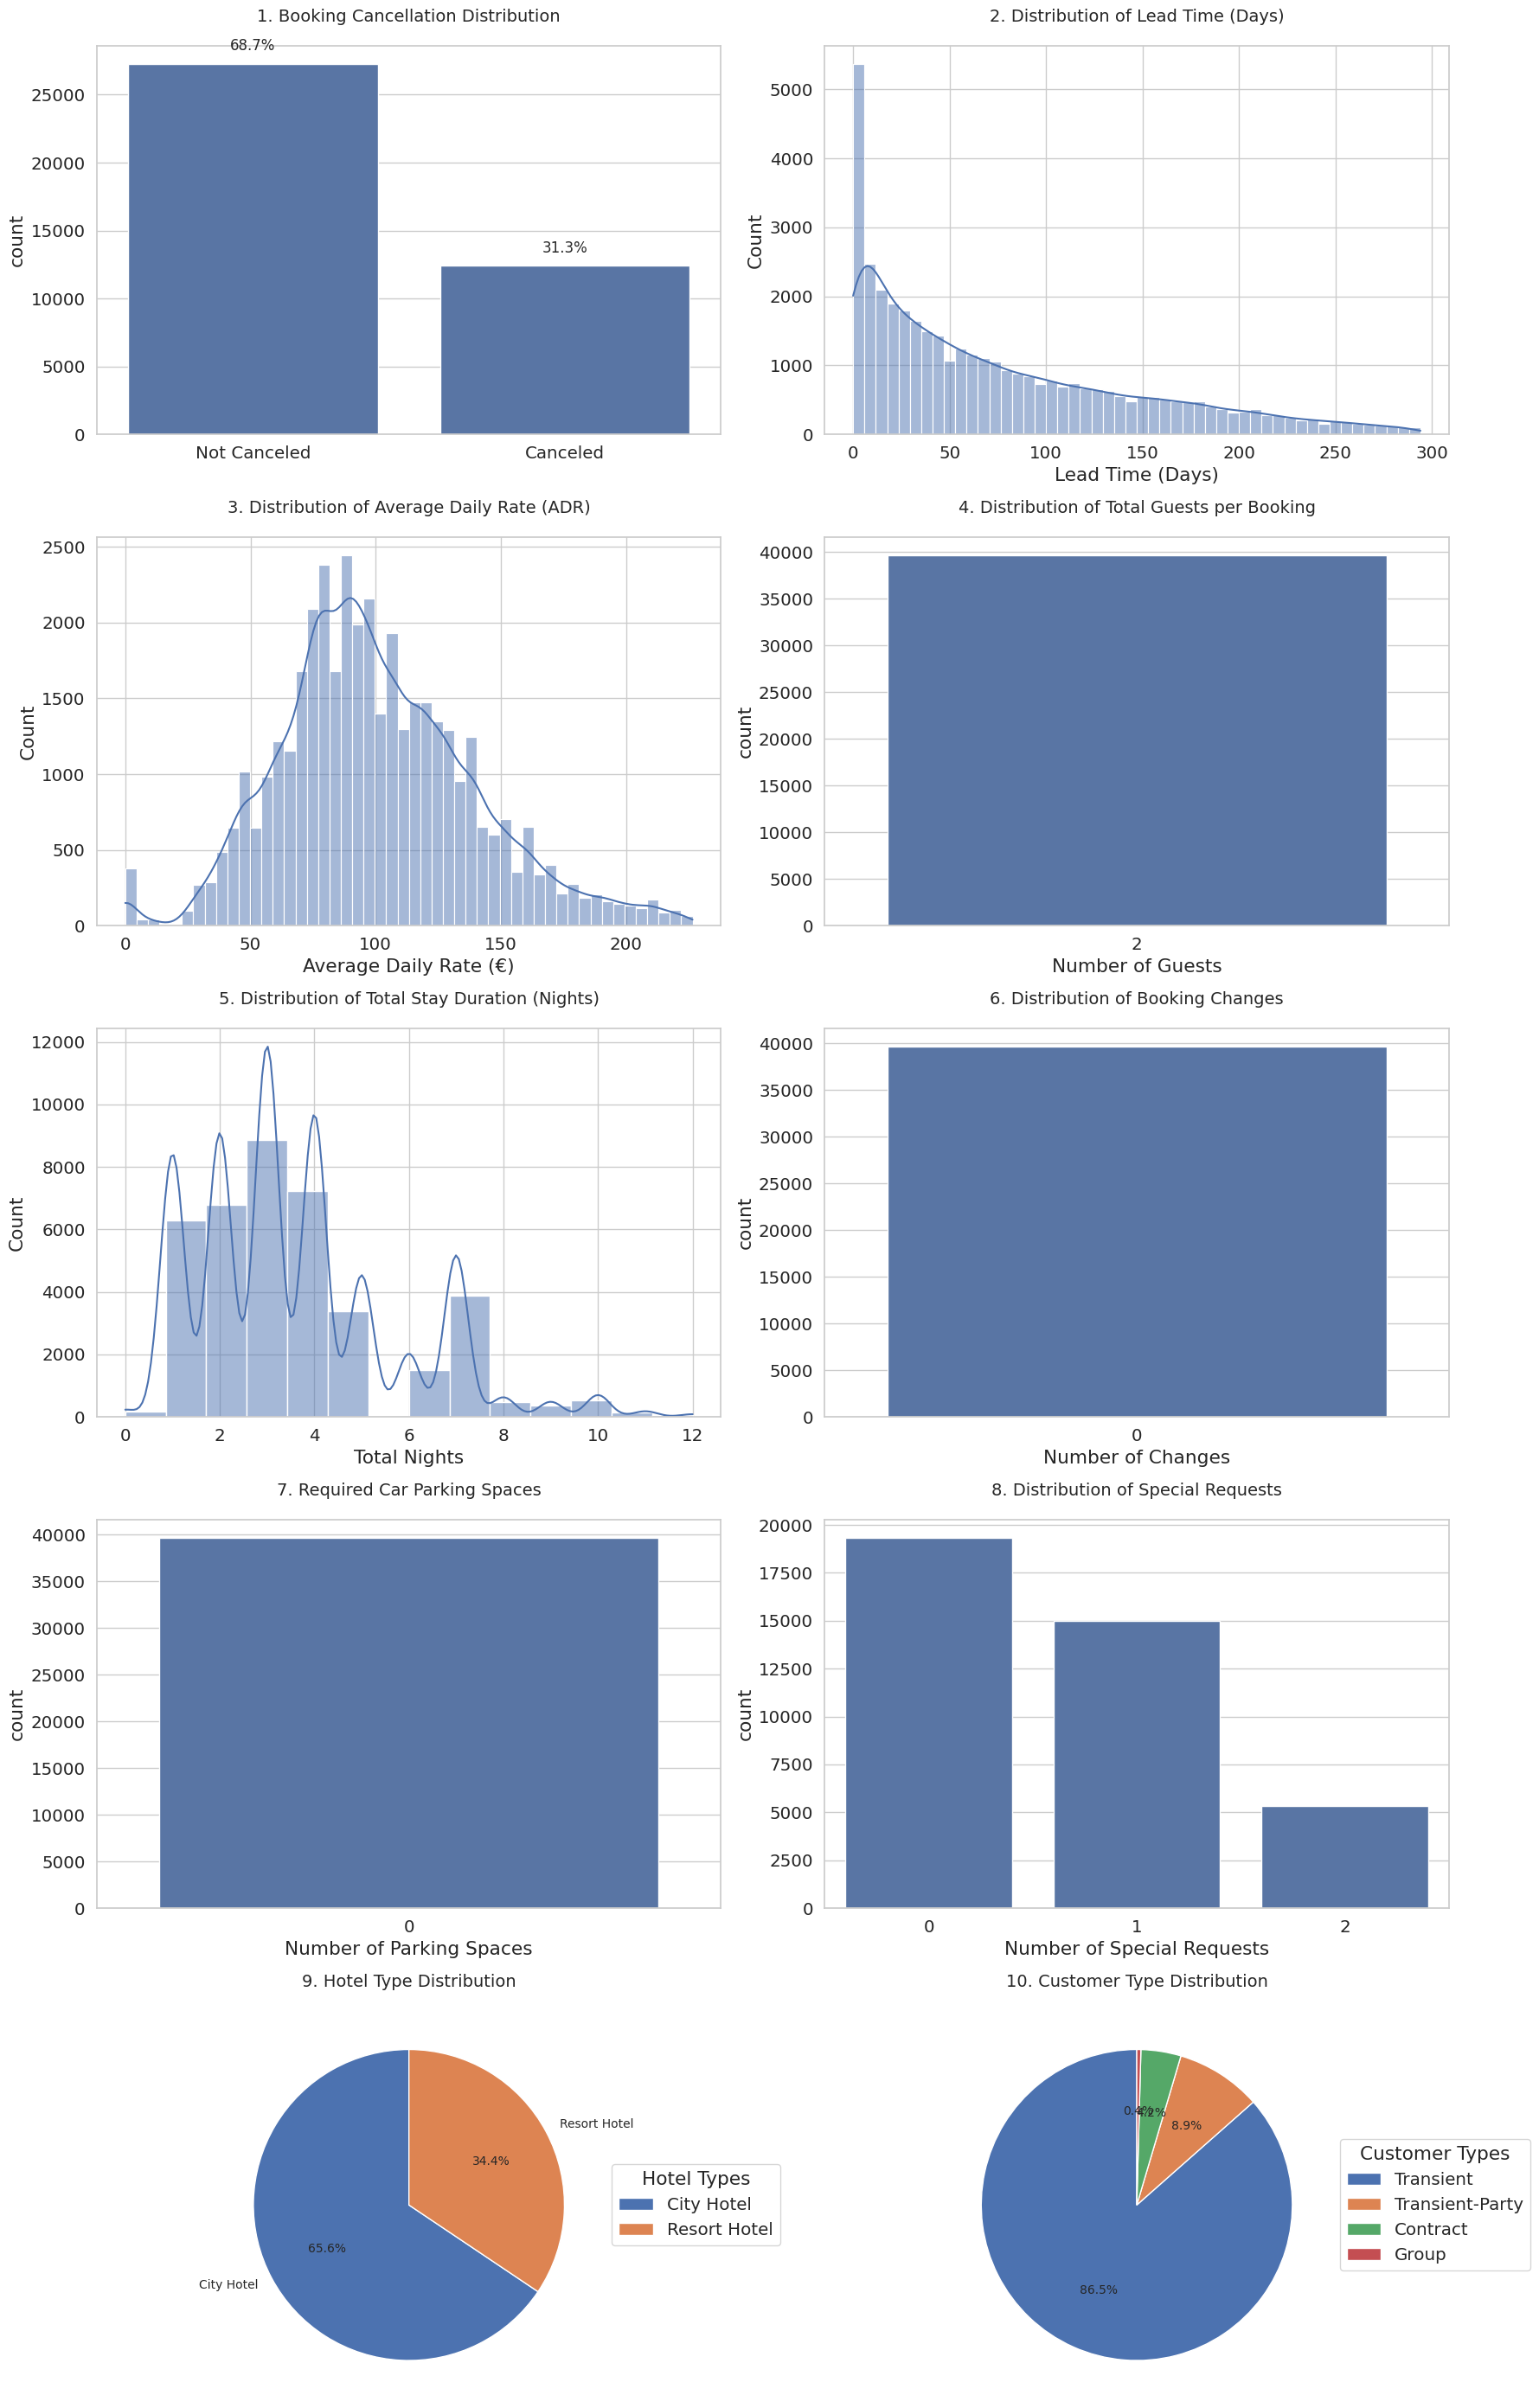

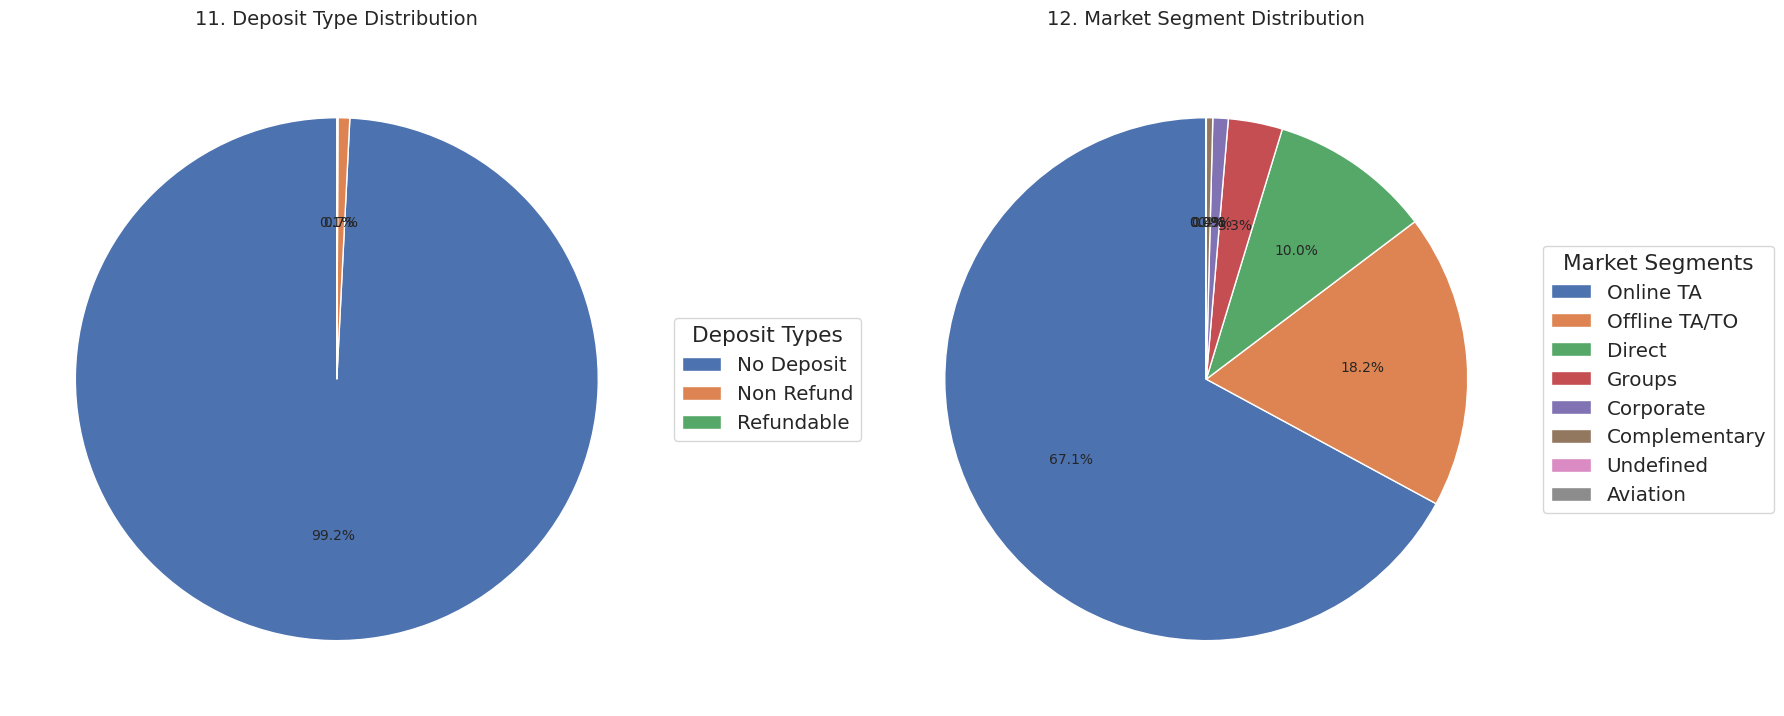

In [168]:

# style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = [18, 24]
plt.rcParams['font.size'] = 12

# Create a figure with subplots
fig = plt.figure(figsize=(18, 28))

# 1. Target Variable Distribution
plt.subplot(5, 2, 1)
ax = sns.countplot(x='is_canceled', data=df)
plt.title("1. Booking Cancellation Distribution", fontsize=14, pad=20)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.xlabel("")

# Add percentage labels
total = float(len(df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 1000,
            '{:1.1f}%'.format((height/total)*100),
            ha='center')

# 2. Lead Time Distribution

plt.subplot(5, 2, 2)
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title("2. Distribution of Lead Time (Days)", fontsize=14, pad=20)
plt.xlabel("Lead Time (Days)")

# 3. Average Daily Rate Distribution
plt.subplot(5, 2, 3)
sns.histplot(df[df['adr'] < 400]['adr'], bins=50, kde=True)
plt.title("3. Distribution of Average Daily Rate (ADR)", fontsize=14, pad=20)
plt.xlabel("Average Daily Rate (€)")

# 4. Total Guests per Booking

plt.subplot(5, 2, 4)
sns.countplot(x='total_guests', data=df[df['total_guests'] <= 6])
plt.title("4. Distribution of Total Guests per Booking", fontsize=14, pad=20)
plt.xlabel("Number of Guests")

# 5. Distribution of Stay Duration
plt.subplot(5, 2, 5)
sns.histplot(df[df['total_nights'] <= 14]['total_nights'], bins=14, kde=True)
plt.title("5. Distribution of Total Stay Duration (Nights)", fontsize=14, pad=20)
plt.xlabel("Total Nights")

# 6. Booking Changes Distribution
plt.subplot(5, 2, 6)
sns.countplot(x='booking_changes', data=df[df['booking_changes'] <= 5])
plt.title("6. Distribution of Booking Changes", fontsize=14, pad=20)
plt.xlabel("Number of Changes")

# 7. Required Car Parking Spaces
plt.subplot(5, 2, 7)
sns.countplot(x='required_car_parking_spaces', data=df)
plt.title("7. Required Car Parking Spaces", fontsize=14, pad=20)
plt.xlabel("Number of Parking Spaces")

# 8. Special Requests
plt.subplot(5, 2, 8)
sns.countplot(x='total_of_special_requests', data=df)
plt.title("8. Distribution of Special Requests", fontsize=14, pad=20)
plt.xlabel("Number of Special Requests")

# 9. Hotel Type
plt.subplot(5, 2, 9)
hotel_counts = df['hotel'].value_counts()
wedges, texts, autotexts = plt.pie(hotel_counts,
                                  labels=hotel_counts.index,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  textprops={'fontsize': 10})
plt.title("9. Hotel Type Distribution", fontsize=14, pad=20)
plt.legend(wedges, hotel_counts.index,
          title="Hotel Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# 10. Customer Type

plt.subplot(5, 2, 10)
customer_counts = df['customer_type'].value_counts()
wedges, texts, autotexts = plt.pie(customer_counts,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  textprops={'fontsize': 10})
plt.title("10. Customer Type Distribution", fontsize=14, pad=20)
plt.legend(wedges, customer_counts.index,
          title="Customer Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

# Second figure for the remaining pie charts
fig = plt.figure(figsize=(18, 12))

# 11. Deposit Type
plt.subplot(1, 2, 1)
deposit_counts = df['deposit_type'].value_counts()
wedges, texts, autotexts = plt.pie(deposit_counts,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  textprops={'fontsize': 10})
plt.title("11. Deposit Type Distribution", fontsize=14, pad=20)
plt.legend(wedges, deposit_counts.index,
          title="Deposit Types",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

# 12. Market Segment
plt.subplot(1, 2, 2)
market_counts = df['market_segment'].value_counts()
wedges, texts, autotexts = plt.pie(market_counts,
                                  autopct='%1.1f%%',
                                  startangle=90,
                                  textprops={'fontsize': 10})
plt.title("12. Market Segment Distribution", fontsize=14, pad=20)
plt.legend(wedges, market_counts.index,
          title="Market Segments",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.tight_layout()
plt.show()

**Bivariate Analysis**

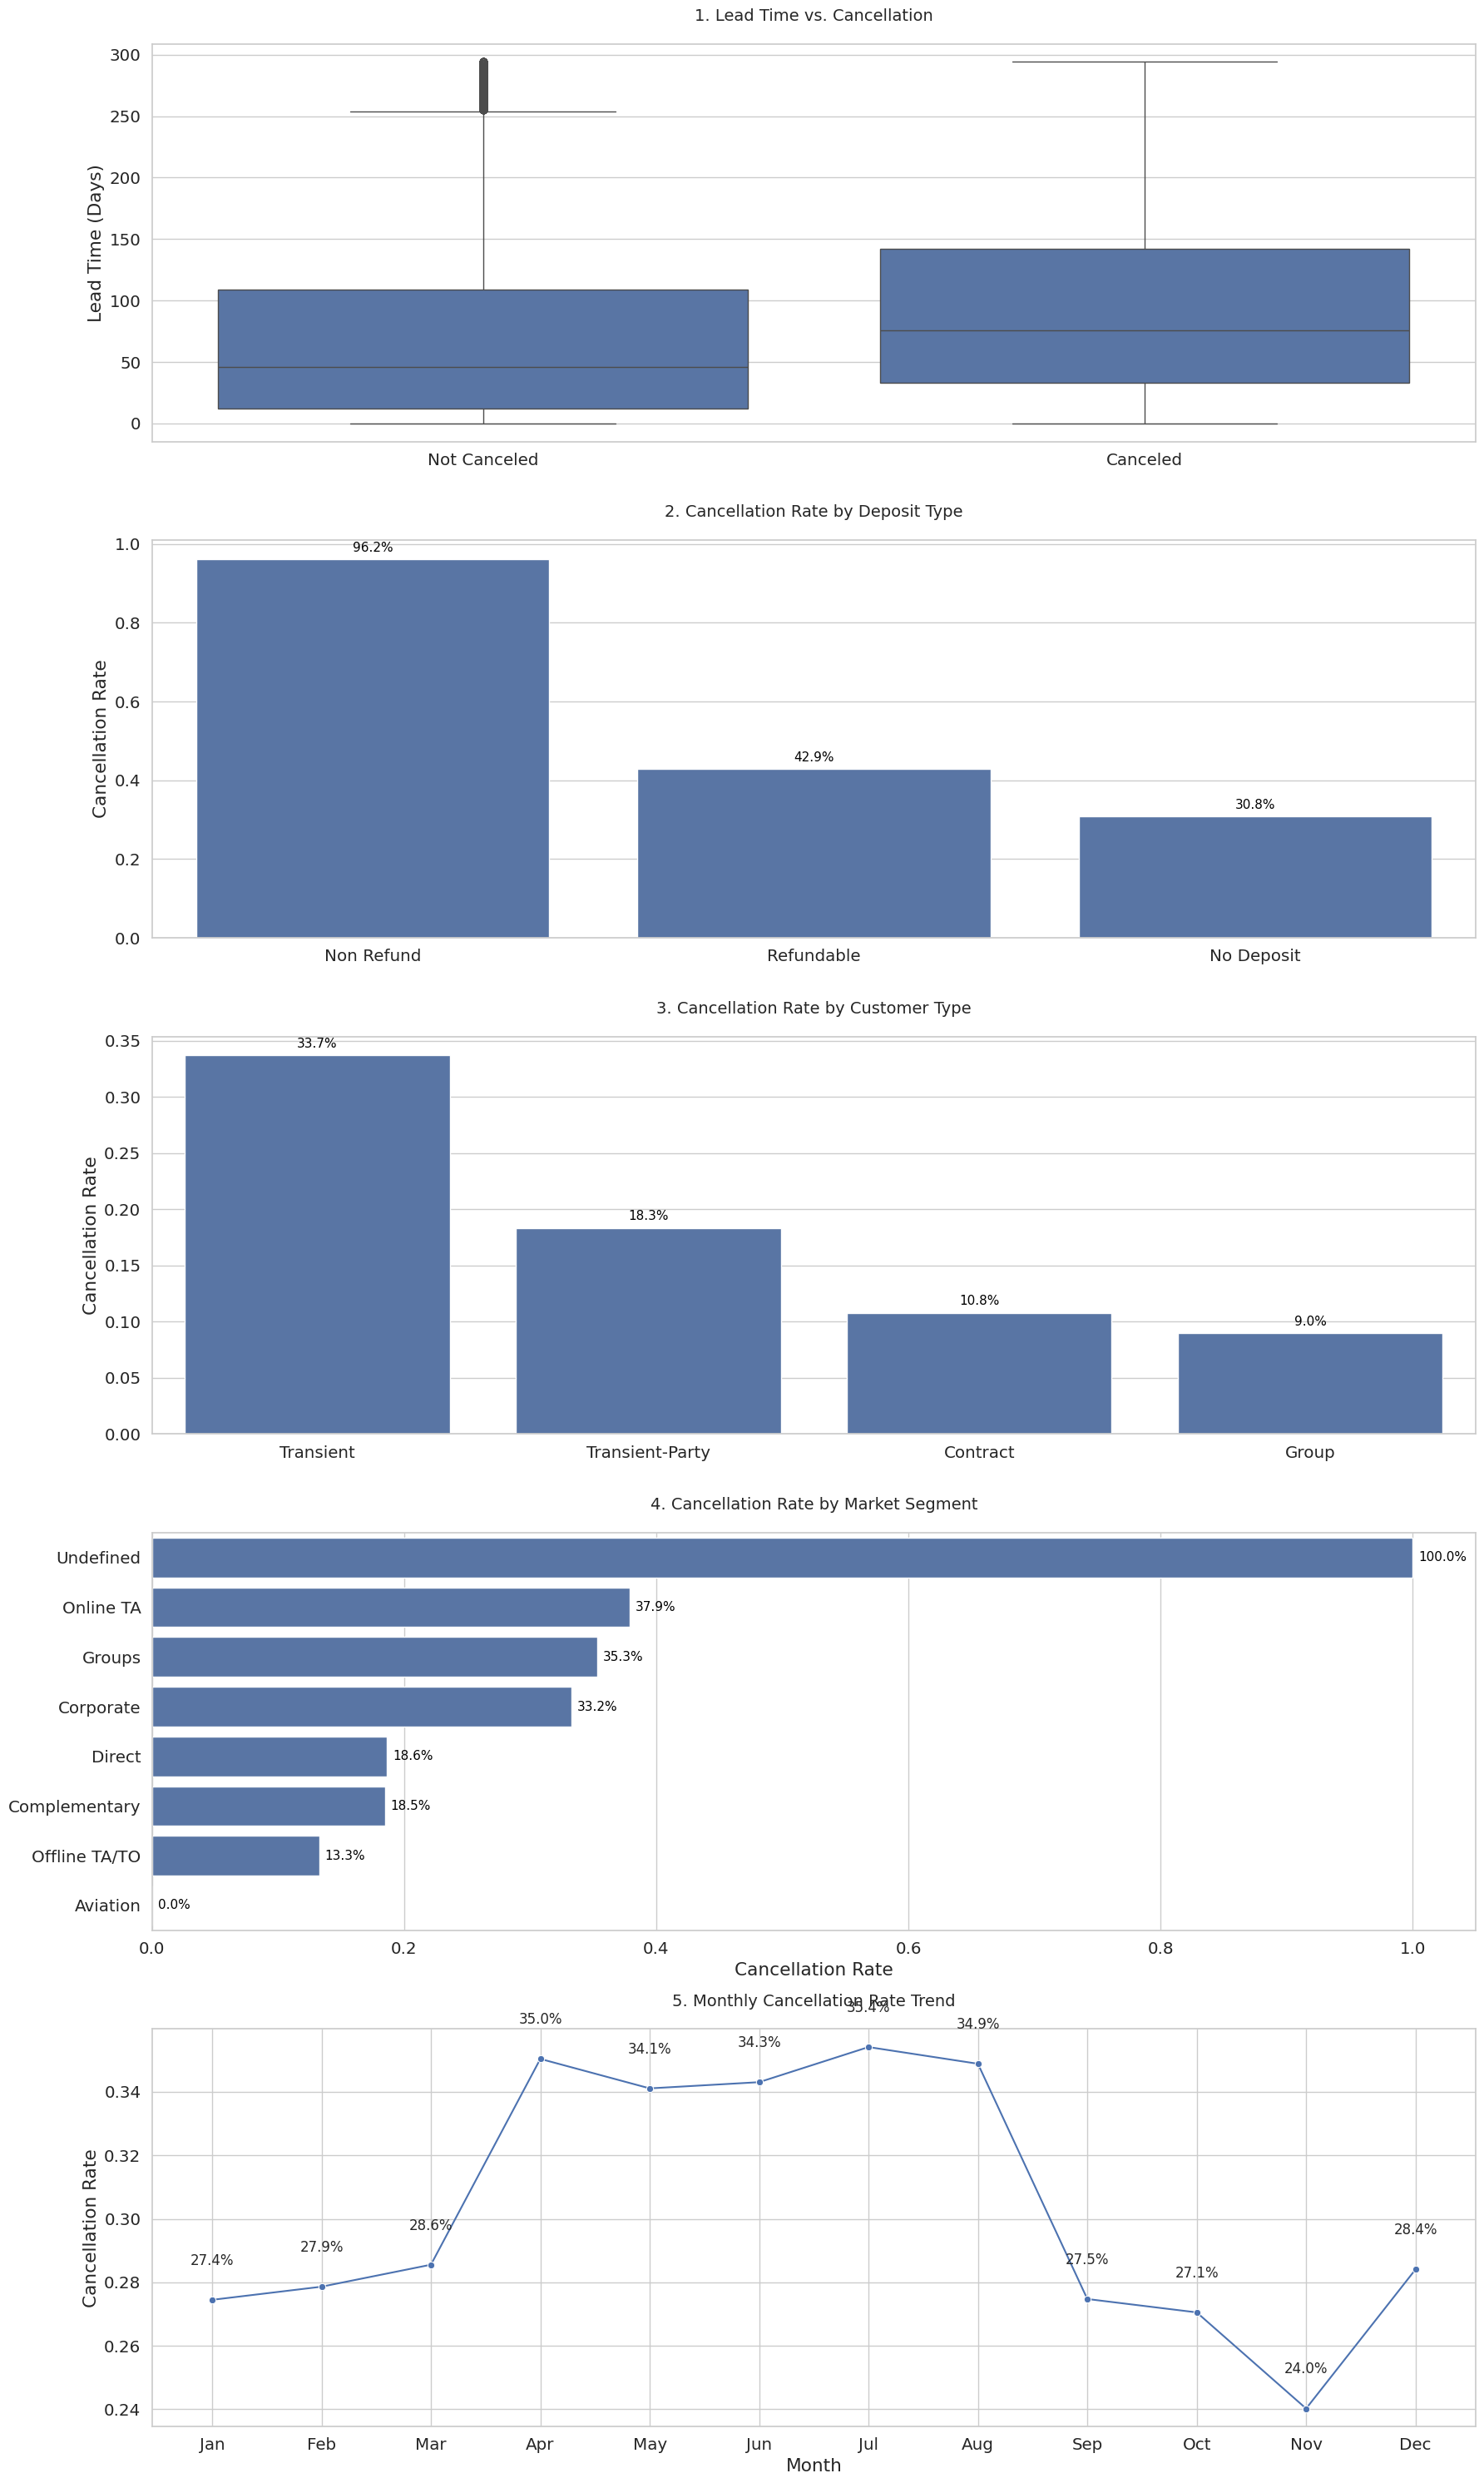

<Figure size 1600x1200 with 0 Axes>

In [169]:

# Create a figure with multiple subplots
plt.figure(figsize=(18, 30))

# 1. Cancellation Rate by Lead Time
plt.subplot(5, 1, 1)
sns.boxplot(x='is_canceled', y='lead_time', data=df)
plt.title("1. Lead Time vs. Cancellation", fontsize=14, pad=20)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.xlabel("")
plt.ylabel("Lead Time (Days)")

# 2. Cancellation Rate by Deposit Type
plt.subplot(5, 1, 2)
cancel_by_deposit = df.groupby('deposit_type')['is_canceled'].mean().reset_index()
ax = sns.barplot(x='deposit_type', y='is_canceled',
                data=cancel_by_deposit.sort_values('is_canceled', ascending=False))
plt.title("2. Cancellation Rate by Deposit Type", fontsize=14, pad=20)
plt.ylabel("Cancellation Rate")
plt.xlabel("")
# Add percentage labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', fontsize=11, color='black',
               xytext=(0, 10),
               textcoords='offset points')

# 3. Cancellation Rate by Customer Type
plt.subplot(5, 1, 3)
cancel_by_customer = df.groupby('customer_type')['is_canceled'].mean().reset_index()
ax = sns.barplot(x='customer_type', y='is_canceled',
                data=cancel_by_customer.sort_values('is_canceled', ascending=False))
plt.title("3. Cancellation Rate by Customer Type", fontsize=14, pad=20)
plt.ylabel("Cancellation Rate")
plt.xlabel("")
# Add percentage labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1%}',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center', fontsize=11, color='black',
               xytext=(0, 10),
               textcoords='offset points')

# 4. Cancellation Rate by Market Segment
plt.subplot(5, 1, 4)
cancel_by_market = df.groupby('market_segment')['is_canceled'].mean().reset_index()
ax = sns.barplot(y='market_segment', x='is_canceled',
                data=cancel_by_market.sort_values('is_canceled', ascending=False))
plt.title("4. Cancellation Rate by Market Segment", fontsize=14, pad=20)
plt.xlabel("Cancellation Rate")
plt.ylabel("")
# Add percentage labels
for p in ax.patches:
    ax.annotate(f'{p.get_width():.1%}',
               (p.get_width(), p.get_y() + p.get_height() / 2.),
               ha='left', va='center', fontsize=11, color='black',
               xytext=(5, 0),
               textcoords='offset points')

# 5. Cancellation Rate by Month
plt.subplot(5, 1, 5)
df['arrival_month'] = pd.to_datetime(df['arrival_date']).dt.month
cancel_by_month = df.groupby('arrival_month')['is_canceled'].mean().reset_index()
ax = sns.lineplot(x='arrival_month', y='is_canceled', data=cancel_by_month, marker='o')
plt.title("5. Monthly Cancellation Rate Trend", fontsize=14, pad=20)
plt.xlabel("Month")
plt.ylabel("Cancellation Rate")
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                         'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
# Add percentage labels
for x, y in zip(cancel_by_month['arrival_month'], cancel_by_month['is_canceled']):
    plt.text(x, y + 0.01, f'{y:.1%}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 6. Correlation Heatmap
plt.figure(figsize=(16, 12))
valid_num_cols = [col for col in numerical_features if col in df.columns]
corr = df[valid_num_cols].corr()



**Multivariate Analysis**

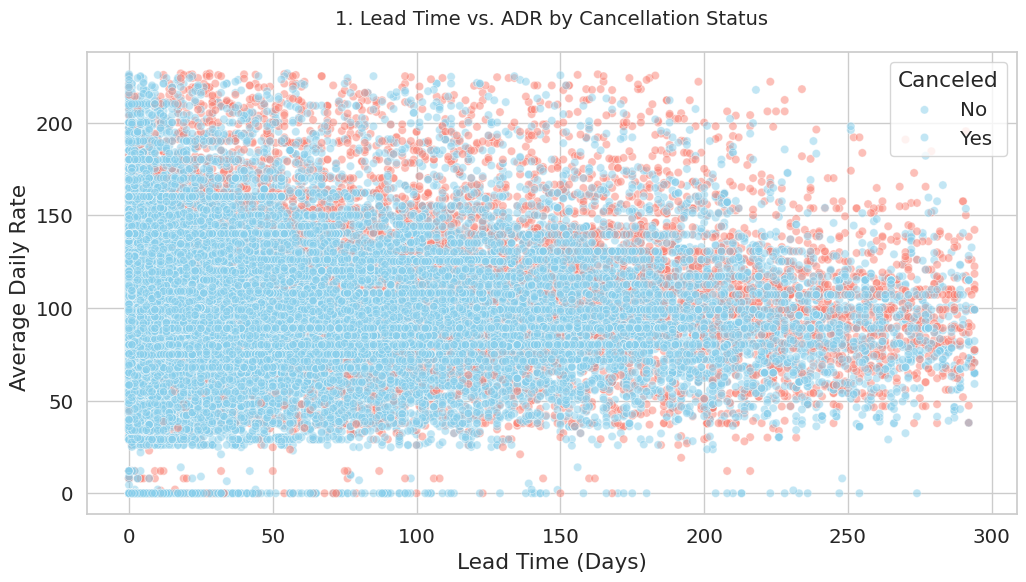

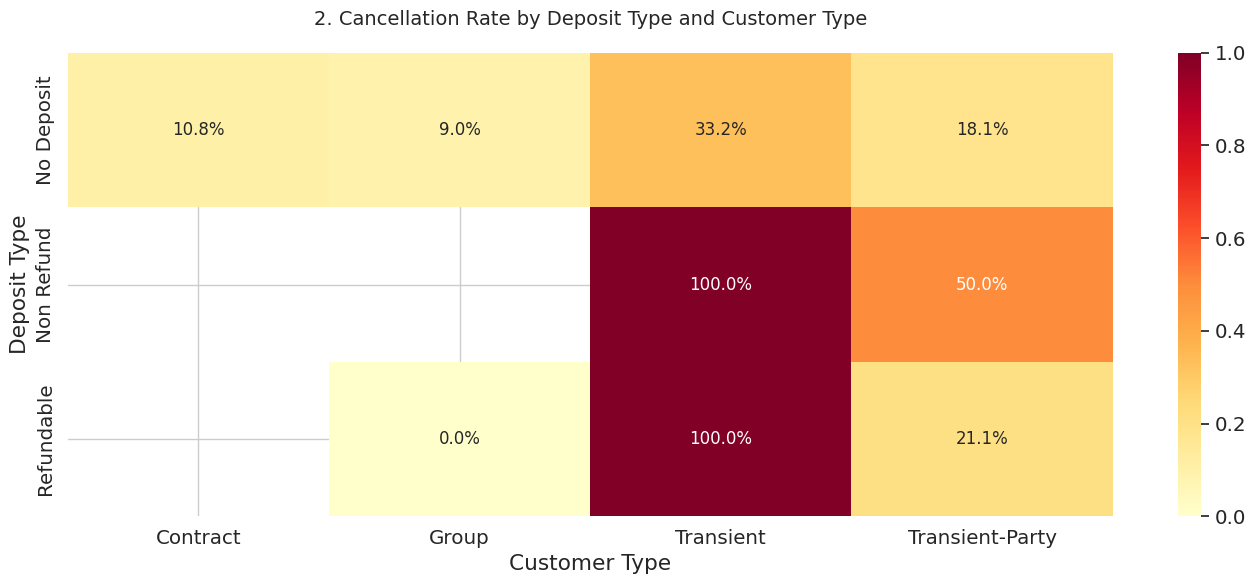

In [170]:
# Lead Time vs. ADR by Cancellation Status
plt.figure(figsize=(12, 6))
sns.scatterplot(x='lead_time', y='adr', hue='is_canceled',
               data=df[(df['adr'] < 400) & (df['lead_time'] < 500)],
               alpha=0.5, palette=['skyblue', 'salmon'])
plt.title("1. Lead Time vs. ADR by Cancellation Status", fontsize=14, pad=20)
plt.xlabel("Lead Time (Days)")
plt.ylabel("Average Daily Rate ")
plt.legend(title='Canceled', labels=['No', 'Yes'])
plt.show()

# Cancellation Rate by Deposit Type and Customer Type
plt.figure(figsize=(14, 6))
cross_tab = pd.crosstab(
    index=df['deposit_type'],
    columns=df['customer_type'],
    values=df['is_canceled'],
    aggfunc='mean'
)
sns.heatmap(cross_tab, annot=True, fmt=".1%", cmap='YlOrRd', vmin=0, vmax=1)
plt.title("2. Cancellation Rate by Deposit Type and Customer Type", fontsize=14, pad=20)
plt.ylabel("Deposit Type")
plt.xlabel("Customer Type")
plt.tight_layout()
plt.show()

**Feature Selection**

In [171]:
# Create a copy of the dataframe for feature selection and separate target
df_encoded = df.drop(columns=['is_canceled']).copy()
y = df['is_canceled'].copy()

# Convert datetime columns to numeric (days since min date)

date_cols = df_encoded.select_dtypes(include=['datetime64']).columns
for col in date_cols:
    df_encoded[col] = (df_encoded[col] - df_encoded[col].min()).dt.days

# Encode categorical variables
cat_cols = df_encoded.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in cat_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))




# Ensure all remaining columns are numeric
for col in df_encoded.columns:
    if not np.issubdtype(df_encoded[col].dtype, np.number):
        try:
            df_encoded[col] = pd.to_numeric(df_encoded[col], errors='coerce')
        except:
            df_encoded = df_encoded.drop(col, axis=1)

In [172]:
# Define features

# Drop any remaining non-numeric columns

X = df_encoded.select_dtypes(include=[np.number]).dropna(axis=1, how='all')
X = X.loc[:, X.nunique() > 1]

# Ensure we don't have any infinite values

X = X.replace([np.inf, -np.inf], np.nan).fillna(0)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [173]:
# 1. Filter Methods
print("\n1. Filter Methods")
print("-" * 50)

# Correlation Analysis
correlation = X_train.corrwith(y_train).sort_values(ascending=False)
print("\nTop 10 features by correlation with target:")
print(correlation.head(10))




# SelectKBest
from sklearn.feature_selection import SelectKBest, f_classif

# Get top 15 features using ANOVA
selector = SelectKBest(score_func=f_classif, k=15)
X_kbest = selector.fit_transform(X_train, y_train)
selected_features = X_train.columns[selector.get_support()]
print("\nTop 15 features using ANOVA (SelectKBest):")
print(selected_features.tolist())


1. Filter Methods
--------------------------------------------------

Top 10 features by correlation with target:
room_same            0.209436
lead_time_months     0.156574
lead_time            0.156574
booking_gap          0.156574
market_segment       0.141762
country              0.137315
adr                  0.132709
arrival_date         0.126609
arrival_date_year    0.115480
deposit_type         0.104426
dtype: float64

Top 15 features using ANOVA (SelectKBest):
['lead_time', 'arrival_date_year', 'country', 'market_segment', 'assigned_room_type', 'deposit_type', 'agent', 'adr', 'total_of_special_requests', 'reservation_status', 'arrival_date', 'booking_gap', 'room_same', 'requests_per_night', 'lead_time_months']


In [174]:

# 2. Wrapper Method - Recursive Feature Elimination (RFE)
print("\n2. Wrapper Method - RFE")
print("-" * 50)

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use RandomForest as the estimator
estimator = RandomForestClassifier(n_estimators=100, random_state=42)
rfe = RFE(estimator, n_features_to_select=10)
X_rfe = rfe.fit_transform(X_train, y_train)



# Get selected features
selected_features_rfe = X_train.columns[rfe.support_]
print("\nTop 10 features selected by RFE:")
print(selected_features_rfe.tolist())


2. Wrapper Method - RFE
--------------------------------------------------

Top 10 features selected by RFE:
['lead_time', 'country', 'market_segment', 'agent', 'reservation_status', 'reservation_status_date', 'booking_gap', 'room_same', 'requests_per_night', 'lead_time_months']


In [175]:
# 3. Embedded Methods
print("\n3. Embedded Methods")
print("-" * 50)

# Feature importance from Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
feature_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 features by Random Forest importance:")
print(feature_importance.head(15))




# Feature importance from XGBoost
from xgboost import XGBClassifier

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Get feature importances
xgb_importance = pd.DataFrame({
    'feature': X_train.columns,
    'importance': xgb.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 15 features by XGBoost importance:")
print(xgb_importance.head(15))





3. Embedded Methods
--------------------------------------------------

Top 15 features by Random Forest importance:
                      feature  importance
20         reservation_status    0.736703
21    reservation_status_date    0.034482
9                     country    0.023518
10             market_segment    0.023441
25                  room_same    0.017906
1                   lead_time    0.015244
15                      agent    0.014954
29           lead_time_months    0.014908
23               arrival_date    0.014087
19  total_of_special_requests    0.013400
28         requests_per_night    0.013282
24                booking_gap    0.012608
26               booking_date    0.012149
18                        adr    0.008332
4    arrival_date_week_number    0.005420


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:17:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Top 15 features by XGBoost importance:
                      feature  importance
20         reservation_status    0.999936
10             market_segment    0.000011
9                     country    0.000011
28         requests_per_night    0.000010
26               booking_date    0.000006
1                   lead_time    0.000006
15                      agent    0.000004
4    arrival_date_week_number    0.000004
21    reservation_status_date    0.000003
23               arrival_date    0.000003
13         assigned_room_type    0.000003
27               total_nights    0.000002
7        stays_in_week_nights    0.000002
5   arrival_date_day_of_month    0.000000
6     stays_in_weekend_nights    0.000000



Final selected features (appearing in at least 2 methods):
['lead_time', 'country', 'market_segment', 'requests_per_night', 'reservation_status', 'agent', 'booking_gap', 'room_same', 'reservation_status_date', 'arrival_date', 'lead_time_months', 'adr', 'assigned_room_type', 'total_of_special_requests', 'booking_date', 'arrival_date_week_number']


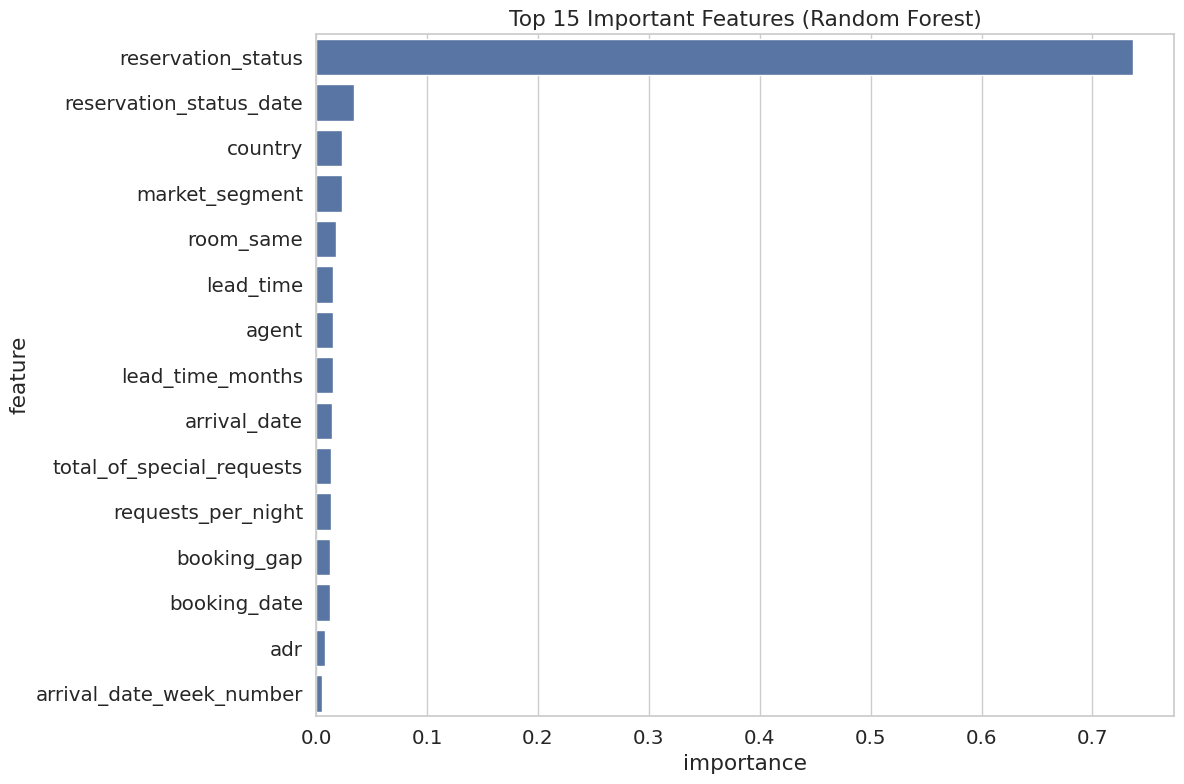


Shape of dataset with selected features: (39654, 17)


In [176]:

# Select final features based on all methods
# Features that appear in top 15 of at least 2 methods
all_selected = pd.concat([
    pd.Series(selected_features),
    pd.Series(selected_features_rfe),
    feature_importance['feature'].head(15),
    xgb_importance['feature'].head(15)
])

feature_votes = all_selected.value_counts()
final_features = feature_votes[feature_votes >= 2].index.tolist()

print("\nFinal selected features (appearing in at least 2 methods):")
print(final_features)

# Visualize feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Important Features (Random Forest)')
plt.tight_layout()
plt.show()

# Save the final selected features
df_selected = df[final_features + ['is_canceled']]
print("\nShape of dataset with selected features:", df_selected.shape)

**Pick and Tune an Algorithm**

In [177]:
# Remove leakage-prone features (this becase at first try we got 1 on all accuracy matrix so we decide to remove those features)
leakage_features = [
    'reservation_status', 'reservation_status_date', 'arrival_date',
    'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month',
    'arrival_month_num', 'reservation_status_date', 'booking_date'
]

# Get final features after removing leakage features
final_features_clean = [f for f in final_features if f not in leakage_features]
print(f"\nOriginal number of features: {len(final_features)}")
print(f"Number of features after removing leakage: {len(final_features_clean)}")
print("\nRemoved features that could cause data leakage:",
      set(final_features) - set(final_features_clean))


Original number of features: 16
Number of features after removing leakage: 12

Removed features that could cause data leakage: {'reservation_status', 'reservation_status_date', 'booking_date', 'arrival_date'}


In [178]:
# Prepare the final dataset with cleaned features
X_final = df_encoded[final_features_clean].copy()
y_final = y.copy()

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X_final, y_final, test_size=0.2, random_state=42, stratify=y_final
)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [179]:
# Initialize models with class weights
models = {
    'Logistic Regression': LogisticRegression(
        max_iter=1000,
        class_weight='balanced',
        random_state=42
    ),
    'Random Forest': RandomForestClassifier(
        class_weight='balanced_subsample',
        random_state=42,
        n_jobs=-1
    ),
    'XGBoost': XGBClassifier(
        scale_pos_weight=sum(y == 0) / sum(y == 1),
        eval_metric='logloss',
        use_label_encoder=False,
        random_state=42,
        n_jobs=-1
    )
}

In [180]:
# Function to evaluate models
def evaluate_model(model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Cross-validation score
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc')

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'cv_roc_auc_mean': cv_scores.mean(),
        'cv_roc_auc_std': cv_scores.std()
    }

In [181]:
print("\n" + "=================================")
print("MODEL TRAINING AND COMPARISON")
print("=================================")


# Evaluate all models
results = {}
for name, model in models.items():
    print(f"\nTraining {name}...")
    results[name] = evaluate_model(model, X_train_scaled, X_test_scaled, y_train, y_test)
    print(f"{name} - ROC AUC: {results[name]['roc_auc']:.4f}, F1: {results[name]['f1']:.4f}")

# Display results
results_df = pd.DataFrame(results).T
print("\nModel Performance Comparison:")
print(results_df[['roc_auc', 'f1', 'accuracy', 'precision', 'recall']].sort_values('roc_auc', ascending=False))


MODEL TRAINING AND COMPARISON

Training Logistic Regression...
Logistic Regression - ROC AUC: 0.7466, F1: 0.5803

Training Random Forest...
Random Forest - ROC AUC: 0.8679, F1: 0.6631

Training XGBoost...


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:18:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:18:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:18:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:18:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:18:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_e

XGBoost - ROC AUC: 0.8771, F1: 0.7049

Model Performance Comparison:
                      roc_auc        f1  accuracy  precision    recall
XGBoost              0.877065  0.704918  0.786660   0.621273  0.814591
Random Forest        0.867914  0.663072  0.803051   0.713225  0.619508
Logistic Regression  0.746648  0.580261  0.671290   0.483110  0.726320


**Hyperparameter Tuning for Best Model**

In [182]:
# tune the best performing model (XGBoost)
print("\nTuning XGBoost hyperparameters...")


param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8],
    'colsample_bytree': [0.8],
    'min_child_weight': [1, 3],
    'gamma': [0, 0.1]
}


xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)



Tuning XGBoost hyperparameters...


In [183]:

# GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    n_jobs=-1,
    verbose=1
)

# Perform the grid search
grid_search.fit(X_train_scaled, y_train)

Fitting 3 folds for each of 32 candidates, totalling 96 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [16:18:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importanc...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 0.1],
                         'learning_rate': [0.01, 0.1], 'max_depth': [3, 5],
                         'min_child_weight': [1, 3], 'n_estimators': [100, 200],
                         'subsample': [0.8]},
             scoring='roc_auc', verbose=1)

In [184]:
print("\n" + "==================================")
print("HYPERPARAMETER TUNING")
print("==================================")


# the best model
best_xgb = grid_search.best_estimator_


print("\nBest parameters found:")
print(grid_search.best_params_)

# Evaluate on test set
y_pred = best_xgb.predict(X_test_scaled)
y_pred_proba = best_xgb.predict_proba(X_test_scaled)[:, 1]



HYPERPARAMETER TUNING

Best parameters found:
{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 200, 'subsample': 0.8}


**Model Validation and Evaluation**

Validation is the process of evaluating a model's performance on unseen data to ensure it generalizes well.
It's important because:
1. Prevents overfitting to the training data
2. Provides realistic performance estimates
3. Helps in model selection and hyperparameter tuning
4. Ensures the model will perform well on new, unseen data


1. Confusion Matrix:


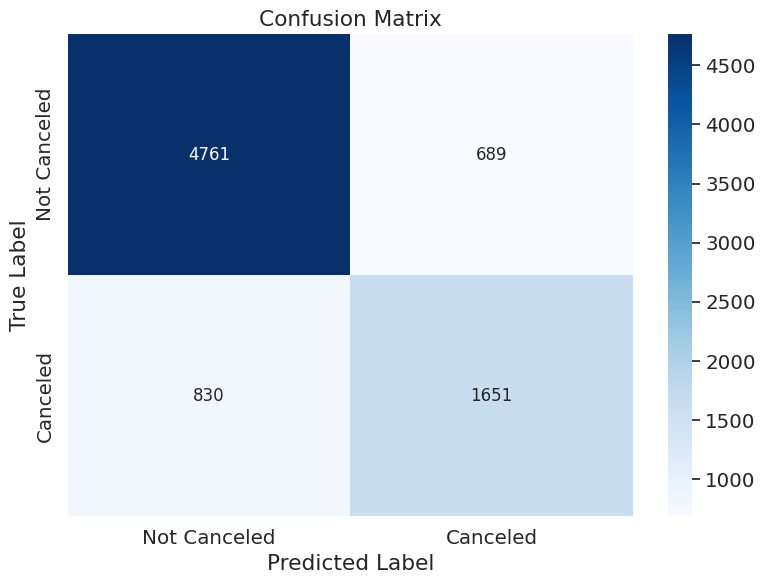

In [185]:
# 1. Confusion Matrix
print("\n1. Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Canceled', 'Canceled'],
            yticklabels=['Not Canceled', 'Canceled'])
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()

In [186]:
# 2. Classification Report
print("\n2. Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Not Canceled', 'Canceled']))



2. Classification Report:
              precision    recall  f1-score   support

Not Canceled       0.85      0.87      0.86      5450
    Canceled       0.71      0.67      0.68      2481

    accuracy                           0.81      7931
   macro avg       0.78      0.77      0.77      7931
weighted avg       0.81      0.81      0.81      7931



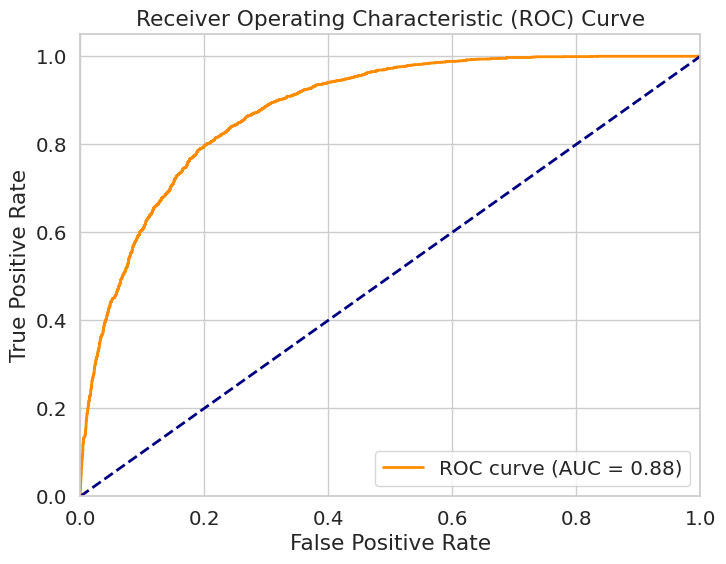

In [187]:


# 3. ROC Curve and AUC
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()



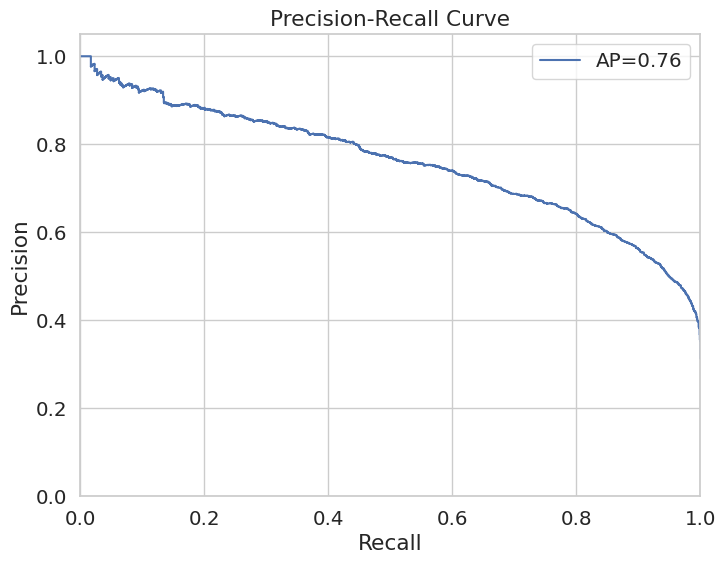

In [188]:

# 4. Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.step(recall, precision, where='post', label=f'AP={average_precision:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.legend(loc='best')
plt.show()

In [189]:
# 5. Cross-validated Metrics
print("\n3. Cross-validated Metrics:")
scoring = {
    'roc_auc': 'roc_auc',
    'accuracy': 'accuracy',
    'precision': 'precision',
    'recall': 'recall',
    'f1': 'f1'
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_results = cross_validate(
    best_xgb, X_train_scaled, y_train, cv=cv, scoring=scoring, n_jobs=-1
)



for metric in scoring.keys():
    print(f"{metric}: {cv_results[f'test_{metric}'].mean():.4f} (+/- {cv_results[f'test_{metric}'].std() * 2:.4f})")


3. Cross-validated Metrics:
roc_auc: 0.8763 (+/- 0.0035)
accuracy: 0.8064 (+/- 0.0039)
precision: 0.7048 (+/- 0.0048)
recall: 0.6559 (+/- 0.0125)
f1: 0.6794 (+/- 0.0083)


In [190]:

# 6. Final Model Evaluation on Test Set
print("\n4. Final Model Performance on Test Set:")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_proba):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")


4. Final Model Performance on Test Set:
ROC AUC: 0.8804
Accuracy: 0.8085
Precision: 0.7056
Recall: 0.6655
F1 Score: 0.6849


In [191]:
# Check if precision and recall meet the minimum threshold (0.3)
final_precision = precision_score(y_test, y_pred)
final_recall = recall_score(y_test, y_pred)

print("\n" + "="*50)
print("MINIMUM REQUIREMENTS CHECK")
print("="*50)
print(f"Precision >= 0.3: {'✓' if final_precision >= 0.3 else '✗'} ({final_precision:.4f})")
print(f"Recall >= 0.3: {'✓' if final_recall >= 0.3 else '✗'} ({final_recall:.4f})")

if final_precision >= 0.3 and final_recall >= 0.3:
    print("\n Model meets the minimum requirements for both precision and recall!")
else:
    print("\n Model does not meet the minimum requirements for precision and/or recall.")
    print("Consider:")
    print("1. Addressing class imbalance (e.g., using class weights, SMOTE)")
    print("2. Feature engineering")
    print("3. Trying different algorithms")
    print("4. Adjusting the decision threshold")


MINIMUM REQUIREMENTS CHECK
Precision >= 0.3: ✓ (0.7056)
Recall >= 0.3: ✓ (0.6655)

 Model meets the minimum requirements for both precision and recall!


Deployment

In [192]:
# Save the model and scaler for deployment
import joblib
import os


os.makedirs('model', exist_ok=True)



# Save the model and scaler
joblib.dump(best_xgb, 'model/xgboost_model.pkl')
joblib.dump(scaler, 'model/scaler.pkl')

print("Model and scaler saved successfully!")

Model and scaler saved successfully!


In [193]:
!pip install streamlit pandas joblib numpy

In [198]:
%%writefile hotel_booking_app.py

import streamlit as st
import pandas as pd
import pickle
from datetime import datetime

# Set page config
st.set_page_config(
    page_title="Hotel Booking Cancellation Predictor",
    page_icon="🏨",
    layout="wide"
)

# Title and description
st.title('🏨 Hotel Booking Cancellation Predictor')
st.markdown('''
This app predicts the likelihood of a hotel booking being cancelled based on booking details.
''')

# Sidebar with instructions
st.sidebar.header('About')
st.sidebar.info('''
**How to use:**
1. Adjust the booking details using the sliders and dropdowns
2. Click the "Predict Cancellation Risk" button
3. View the prediction and recommendations
''')

# Add image
st.image('https://images.unsplash.com/photo-1566073756799-095069737dd0?ixlib=rb-1.2.1&auto=format&fit=crop&w=1350&q=80',
         use_column_width=True,
         caption='Hotel Booking Analysis')

# Create input form
with st.form("booking_form"):
    st.header("Enter Booking Details")

    # Layout in two columns for better organization
    col1, col2 = st.columns(2)

    with col1:
        # Key numerical features
        lead_time = st.slider('Lead Time (days until check-in)', 0, 400, 30,
                            help="Number of days between booking and check-in")
        total_guests = st.slider('Total Number of Guests', 1, 10, 2)
        total_stay = st.slider('Total Stay Duration (nights)', 1, 30, 3)
        booking_gap = st.slider('Days Between Booking and Status Update', -365, 0, -7,
                              help="Negative values mean status was updated before arrival")
        adr = st.number_input('Average Daily Rate (USD)',
                            min_value=0.0,
                            max_value=1000.0,
                            value=100.0,
                            step=1.0)

    with col2:
        # Categorical features
        room_same = st.radio('Is Assigned Room Same as Reserved?',
                           ['Yes', 'No'],
                           horizontal=True)
        is_repeated_guest = st.radio('Is This a Repeated Guest?',
                                   ['Yes', 'No'],
                                   horizontal=True)
        previous_cancellations = st.number_input('Previous Cancellations',
                                               min_value=0,
                                               max_value=10,
                                               value=0,
                                               help="Number of previous booking cancellations")
        booking_changes = st.number_input('Number of Booking Changes',
                                        min_value=0,
                                        max_value=10,
                                        value=0)
        special_requests = st.number_input('Special Requests',
                                         min_value=0,
                                         max_value=5,
                                         value=0,
                                         help="Number of special requests made")

        deposit_type = st.selectbox('Deposit Type',
                                  ['No Deposit', 'Non Refund', 'Refundable'])

    # Submit button
    submitted = st.form_submit_button("Predict Cancellation Risk")

# When form is submitted
if submitted:
    # Prepare input data
    input_data = {
        'lead_time': lead_time,
        'total_guests': total_guests,
        'total_stay': total_stay,
        'booking_gap': booking_gap,
        'adr': adr,
        'room_same': 1 if room_same == 'Yes' else 0,
        'is_repeated_guest': 1 if is_repeated_guest == 'Yes' else 0,
        'previous_cancellations': previous_cancellations,
        'booking_changes': booking_changes,
        'total_of_special_requests': special_requests,
        'deposit_type_No Deposit': 1 if deposit_type == 'No Deposit' else 0,
        'deposit_type_Non Refund': 1 if deposit_type == 'Non Refund' else 0,
        'deposit_type_Refundable': 1 if deposit_type == 'Refundable' else 0
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # Try to load model and make prediction
    try:
        # Load the model and transformer
        with open('model/xgboost_model.pkl', 'rb') as f:
            model = pickle.load(f)

        with open('model/transformer.pkl', 'rb') as f:
            transformer = pickle.load(f)

        # Transform input data
        X_transformed = transformer.transform(input_df)

        # Make prediction
        prediction = model.predict(X_transformed)[0]
        proba = model.predict_proba(X_transformed)[0][prediction]

    except Exception as e:
        st.error(f"Error loading model: {str(e)}")
        st.warning("Using sample prediction for demonstration")
        prediction = 0  # Default to not cancelled
        proba = 0.7  # Default probability

    # Display results
    st.header("Prediction Result")

    if prediction == 1:
        st.error(f"**High Cancellation Risk** (Confidence: {proba:.1%})")

        with st.expander("Recommendations for High-Risk Bookings"):
            st.markdown("""
            - **Offer flexible cancellation policy**
            - **Send personalized offers** to encourage keeping the reservation
            - **Request a deposit** to secure the booking
            - **Follow up** with a courtesy call or email
            - **Consider overbooking** based on historical no-show rates
            """)
    else:
        st.success(f"**Low Cancellation Risk** (Confidence: {1-proba:.1%})")

        with st.expander("Recommendations for Low-Risk Bookings"):
            st.markdown("""
            - **Send booking confirmation** with clear policies
            - **Offer room upgrades** or additional services
            - **Share local attractions** and weather forecast
            - **Request feedback** after the stay
            - **Encourage repeat bookings** with loyalty programs
            """)

    # Show input summary
    with st.expander("📋 View Booking Details"):
        st.dataframe(input_df.style.highlight_max(axis=0))

# Add model information
st.markdown("---")
st.markdown("""
### About This Model
- **Model Type**: XGBoost Classifier
- **Training Data**: Historical hotel booking data
- **Key Features**: Lead time, guest count, stay duration, booking gap, room assignment, guest history, and special requests

### Understanding the Features
- **Lead Time**: Longer lead times often correlate with higher cancellation rates
- **Booking Gap**: Recent updates to the booking may indicate changes in plans
- **Special Requests**: More special requests may indicate higher commitment
- **Previous Cancellations**: Guests who canceled before are more likely to cancel again
""")

Writing hotel_booking_app.py


In [199]:
import joblib

# Load the model and scaler
try:
    model = joblib.load('model/xgboost_model.pkl')
    scaler = joblib.load('model/scaler.pkl')
    print("Model and scaler loaded successfully!")
except Exception as e:
    print(f"Error loading model: {str(e)}")

Model and scaler loaded successfully!


In [200]:
!streamlit run hotel_booking_app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.196.23.16:8501

  Stopping...
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/streamlit/web/bootstrap.py", line 348, in run
    if asyncio.get_running_loop().is_running():
       ^^^^^^^^^^^^^^^^^^^^^^^^^^
RuntimeError: no running event loop

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/bin/streamlit", line 8, in <module>
    sys.exit(main())
             ^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1442, in __call__
    return self.main(*args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", line 1363, in main
    rv = self.invoke(ctx)
         ^^^^^^^^^^^^^^^^
  File "/usr/local/lib/python3.11/dist-packages/click/core.py", l